# SPRING 2021
# Applied Machine Learning, HW 5

*Instructions:* Read all problems very carefully. Make sure that you are answering all questions included in a given problem. Every problem has a code cell inserted at the very end. You must show your solution in the code cell and run the cell by pressing the SHIFT and ENTER buttons simultaneously. The output of the cell must demonstrate the correctness of your solution. If you need to insert more code cells -- feel free to do so.

**Problem 1** 

*Direction:* do every item in a separte code cell.

1. Using NumPy `np.linspace` function create a NumPy array of 101 (one hundred and one) evenly spaced values from 0 to 1 (both limits are inclusive). Call it `x` and print the first ten elements of `x` to the screen.
3. Create a NumPy array called `y` using the following formula: $y = 3.7 x$, where `x` is the array you created in step 1. Print the first ten elements of `y` to the screen.
4. Now, let's add some noise to the $y$ values. To this end, set the NumPy random seed equal to 42 and immediately after that create an array called `noise` that contains 101 values pulled from the normal distribution with a mean of 0 and a standard deviation of 0.3. Print the first ten elements of `noise` to the screen.
5. Add `noise` to `y` and save the result in `y` (yes, overwrite this variable). Print the first ten elements of this new `y` array to the screen.
6. Make a scatter plot of $y$ versus $x$ and label the horizontal and vertical axes as $x$ and $y$, respectively. The title of your plot must say $y = 3.7x + \text{noise}$ (you are not required to use $\LaTeX$ math typing if you are not familiar with it -- it is okay to use regular English characters 'x' and 'y'). Set the `figsize` parameter of `plt.figure` to `(5, 5)`.
7. Imagine that you want to perform a linear fit on these data with zero vertical intercept ($\theta_0 = 0$), so that your fit line is completely determined by its slope $\theta_1$. With this assumption in mind, write a Python function `compute_mse()` computing $\text{MSE}$ for any given slope.
8. Use a `for`-loop to iterrate over the following list of slope values: `[3.2, 3.5, 3.7, 3.9, 4.2]`. For each of these slope values, compute $\text{MSE}$ using the function you created in the previous step and print the results to the screen in the form of the following sentence: "Slope: ???; MSE: ???", where, as usual, the ??? parts must be replaced with the actual slope and $\text{MSE}$ values.
8. Based on your results, which one of these slopes is the best and why? Does it agree with your expectations (take a look at the equation that we used to create the $y$ data)?
9. Starting with a slope of 2.3 perform two steps of gradient descent using a learing rate of 0.7. All relevant formulas can be found in the linear regression notebook available in the shared Google Drive folder. Save the initial and the updated values of the slope as `slope_1`, `slope_2`, and `slope_2`. Print the updated values of the slope to the screen.  
10. Add three straight lines to the graph that you created in step 6 (you can simply copy and paste your code from step 6 into a new code cell and use it as a starting point). Use different colors for the lines (e.g. green, blue, red). What do you see? Do the fit lines seem to be moving in the right direction?


In [ ]:
import numpy as np
x = np.linspace(0,1,num=101)
print(x[:10])


[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09]


In [ ]:
y = 3.7 * x
print(y[:10])



[0.    0.037 0.074 0.111 0.148 0.185 0.222 0.259 0.296 0.333]


In [ ]:
np.random.seed(42)
noise = np.random.normal(loc=0.0, scale=0.3, size=101)
print(noise[:10])

[ 0.14901425 -0.04147929  0.19430656  0.45690896 -0.07024601 -0.07024109
  0.47376384  0.23023042 -0.14084232  0.16276801]


In [ ]:
y = y + noise
print(y[:10])

[ 0.14901425 -0.00447929  0.26830656  0.56790896  0.07775399  0.11475891
  0.69576384  0.48923042  0.15515768  0.49576801]


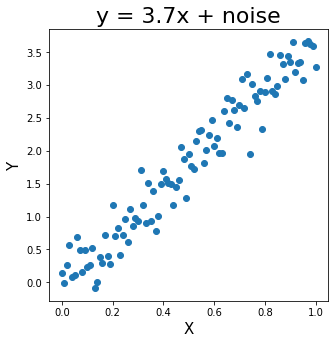

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.xlabel("X", fontsize=15)
plt.ylabel("Y", fontsize=15)
plt.title("y = 3.7x + noise",fontsize=22)
plt.plot(x,y,'o')

In [ ]:
def compute_mse(slope, y, x):
       return ((y - slope*x)**2).mean()

In [ ]:
for i in [3.2, 3.5, 3.7, 3.9, 4.2]:
  res = compute_mse(i,y,x)
  print('Slope :', i, 'MSE :', res  )

Slope : 3.2 MSE : 0.1432311814804211
Slope : 3.5 MSE : 0.0824957478507192
Slope : 3.7 MSE : 0.07550545876425119
Slope : 3.9 MSE : 0.09531516967778317
Slope : 4.2 MSE : 0.1752797360480813


The smallest MSE in the list of slopes was found with using a slope of 3.7, my expectation was that the smallest slope would have the smallest MSE but it did not.

In [ ]:
slope_1 = 2.3
lr = 0.7

y_pred = slope_1*x

slope_2 = slope_1 - 2*(-1)*((y-y_pred)*x).mean()*lr
y_pred_1 = slope_2*x

slope_3 = slope_2 - 2*(-1)*((y-y_pred_1)*x).mean()*lr
y_pred_2 = slope_3*x

print(slope_1, '\n')
print(slope_2, '\n')
print(slope_3, '\n')

2.3 

2.934166011802638 

3.2709081640698385 



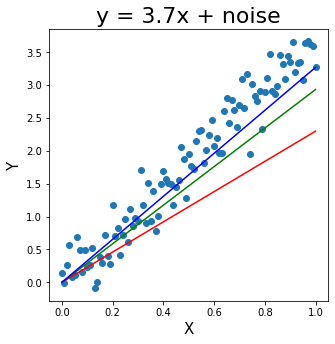

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.xlabel("X", fontsize=15)
plt.ylabel("Y", fontsize=15)
plt.title("y = 3.7x + noise",fontsize=22)
plt.plot(x,y,'o')
plt.plot(x, y_pred, color='red', label=1)
plt.plot(x, y_pred_1, color='green', label=2)
plt.plot(x, y_pred_2,color='blue', label=3)

I see the line moving in the right direction but it does need more iterations of gradient descent to get a way better fit.

**Problem 2** 

*Direction:* do every item in a separte code cell.

In this problem, you will be working with the miles-per-galon (MPG) and weight data from the Auto MPG data set. These are the same data that you used in Problem 4 on your previous homework. 
1. Mount your Google Drive to Google Colab.
2. Copy the NumPy array files `'mpg.npy'` and `'weight.npy'` from the shared Google Drive folder to some folder on your Google Drive. Create a new `Path` object using the `pathlib` library pointing to this folder. For example, for me, the path looks like this: 

  `'/content/gdrive/My Drive/Colab Notebooks/Applied_Machine_Learning/Data/Auto_MPG'`

  But yours might be different. Use the name `PATH` for this object.
3. Load the MPG and weight data from the `'mpg.npy'` and `'weight.npy'`. Save the data in the form of two NumPy arrays named `mpg` and `weight`. 
4. Are there any missing values in the data? Prove it! If there are any missing values remove them and save the resulting arrays under the same names `mpg` and `weight`.
5. Next, you will need to perform linear regression on these data treating `mpg` and a label (or *target*) and `weight` as a feature. You are allowed to use the following tools from the sklearn library: `StandardScaler` and `LinearRegression`. Print the resulting values of the slope and vertical intercept to the screen.
6. Create a plot showing the data points and the best fit line. Label your horizontal and vertical axes as "Weight" and "MPG", respectively. Add a title to the plot saying "Auto MPG data: city-cycle". Set the `figsize` parameter of `plt.figure` to `(5, 5)`. To create the best fit line follow these steps:
  * Use `np.linspace` to create an array of 100 evenly spaced values between the smallest and the largest values of `weight` (make the limiting values inclusive). Call this array `x`.
  * Transform `x` using an appropriate sklearn method and the fitted standard scaler from the previous step (do not fit it again!). Don't forget to reshape `x` before transforming it and save the scalled array as `x_sc`.
  * Predict the MPG values on `x_sc` using an appropriate sklearn method and your linear model from the previous step. Save the result as `y_pred`.
  * Plot `y_pred` versus `x_sc`. This is your best fit line. Use the red color for this line.
7. Does the best fit line look reasonable? What do you think can make our fit even better?

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from pathlib import Path 
PATH = Path('/content/gdrive/My Drive/Colab Notebooks/Auto_MPG')


In [ ]:
import numpy as np

mpg = np.load(PATH/'mpg.npy')
weight = np.load(PATH/'weight.npy')

In [ ]:

mask_mpg = np.isnan(mpg)
mask_weight = np.isnan(weight)
print(np.count_nonzero(mask_mpg))
print(np.count_nonzero(mask_weight))


0
0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import  StandardScaler

lr_st = LinearRegression()
sc_st = StandardScaler()

weight_st = sc_st.fit_transform(weight.reshape(-1, 1))
lr_st.fit(weight_st, mpg)

print(lr_st.coef_) 
print(lr_st.intercept_)



[-6.49270202]
23.514572864321607


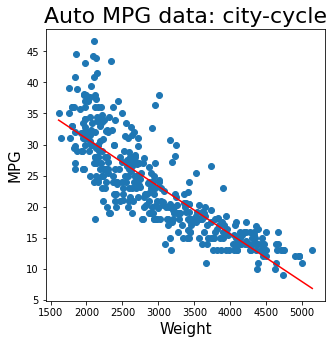

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.plot(weight,mpg,'o')
plt.xlabel("Weight", fontsize=15)
plt.ylabel("MPG", fontsize=15)
plt.title("Auto MPG data: city-cycle",fontsize=22)
x = np.linspace(start=weight.min(),stop=weight.max(),num=100)
x_sc = x.reshape(-1,1)
x_new_sc = sc_st.transform(x_sc)
y_pred = lr_st.predict(x_new_sc)
plt.plot(x_sc,y_pred,color='red')

This line fits but not well. We need to use a polynomial line to fit the data.

**Problem 3**

*Direction:* This is a theoretical problem. Solve it and turn in a hard copy of your step-by-step solution.

Consider the following function of two Cartesian coordinates $x$ and $y$:

$$
\phi (x, y) = \frac{x^2y}{5} - 4\sqrt{x^2 - y^2}  + 5e^{x/3}\;.
$$

1. Compute the $x$ and $y$ components of the gradient of this function. Call this components $\nabla_x\phi$ and $\nabla_y\phi$.
2. Evaluate $\nabla_x\phi$ and $\nabla_y\phi$ at a point whose $x$ and $y$ coordinates are $3.8$ and $-1.5$, respectively.